# Food Recall FDA Data Analysis Project
#### This project analyzes food recall data collected from the openFDA API.  
The main objectives are:

- Understand the trend of food recalls over time.
- Predict the number of food recalls using machine learning.
- Analyze the distribution of recall severity classifications.


In [ ]:
# Import libraries needed for API request and data
import requests
import pandas as pd

We used the openFDA API to collect food recall data. Using Python and the requests library, we sent a GET request to the API endpoint to retrieve up to 1000 records in JSON format. The response was then converted into a Python dictionary. After fetching the data, we loaded it into a pandas DataFrame to make it easier to handle and analyze.


In [ ]:
# Set up the URL to call the openFDA API
url = 'https://api.fda.gov/food/enforcement.json?limit=1000'
# Send a GET request to the API
response = requests.get(url)
response.raise_for_status()
data = response.json()
# we used Python and the `requests` library to automatically fetch the data in JSON format. So we didn't need to manually crawl web pages or use Selenium, because the API gave us direct access to the information we needed. After fetching the data, we processed it to prepare for the analysis part.

In [ ]:
# Convert JSON to pandas DataFrame (basic style)
results = data['results']  # Get the 'results' part from JSON
recall_data = pd.DataFrame(results)  # Create DataFrame

# Show DataFrame
recall_data

,status,city,state,country,classification,openfda,product_type,event_id,recalling_firm,address_1,...,recall_number,product_description,product_quantity,reason_for_recall,recall_initiation_date,center_classification_date,termination_date,report_date,code_info,more_code_info
0,Terminated,Davie,FL,United States,Class II,{},Food,75272,Pharmatech LLC,4131 SW 47th Ave Ste 1403,...,F-0276-2017,"CytoDetox, Hydrolyzed Clinoptilolite Fragments...","1,990 bottles",Recall initiated as a precautionary measure du...,20160808,20161025,20240923,20161102,"UPC No. 632687615989; Lot No. 30661601, Exp. D...",
1,Terminated,Millbrae,CA,United States,Class II,{},Food,75069,Magic Gourmet Trading Inc,375 Adrian Rd,...,F-0865-2017,Koi Palace Mini Moon Cake: Single Box - Mini O...,"2 cases (1 pc/bx, 48bx/cs)","Mooncake products, manufactured and distribute...",20160831,20170106,20170111,20170118,"FG-M1MOT-UW Best by Nov 1, 2016.",
2,Terminated,Miami,FL,United States,Class I,{},Food,69516,"Oasis Brands, Inc",13439 NW 19 LANE,...,F-0609-2015,Crema GuateLinda (Guatemalan Style Cream) in i...,144 pieces,Virginia State (VDACS) found Listeria monocyto...,20141010,20141202,20170328,20141210,UPC 635349 000390 Best By dates: 07/01/14 thr...,NaN
3,Terminated,Pompano Beach,FL,United States,Class I,{},Food,62750,FreshPoint South Florida,2300 NW 19th St,...,F-1922-2012,"Yellow Onion. Product is labeled in part: ""*...",7 cases,FreshPoint South Florida is recalling sliced f...,20120727,20120808,20141008,20120815,Item # 302940.,
4,Terminated,Rancho Dominguez,CA,United States,Class III,{},Food,85253,"Organic By Nature, Inc.",2610 Homestead Pl,...,F-0904-2020,Pure Planet Organic Parasite Cleanse; Net Wt....,xx,Firm was notified by supplier that Organic Gro...,20200224,20200413,20210202,20200401,Lot codes: 72746,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Terminated,Anaheim,CA,United States,Class I,{},Food,75590,AC Creamery,1835 N Orangethorpe Park Ste B,...,F-0624-2017,Manila Sky Purple Yumm Ice Cream 16 oz.,83 cases,Potential Listeria monocytogenes contamination.,20161102,20161207,20170531,20161214,"Expiration date Mar 06, 2018.",NaN
996,Terminated,Baltimore,MD,United States,Class I,{},Food,91653,"FRESH IDEATION FOOD GROUP, LLC dba Fresh Creat...",2800 Wegworth Ln,...,F-0182-2024,"Orchard Bistro, Margharita Rustic Flatbread Pi...",28,"On 02/03/2023, FRESH IDEATION FOOD GROUP, LLC ...",20230203,20231017,20231017,20230322,UPC Code : 813141020840,NaN
997,Terminated,Fremont,CA,United States,Class II,{},Food,62737,San Francisco Herb & Natural Food Company,47444 Kato Rd,...,F-2306-2012,Olive Leaf Organic Whole; Distributed by San ...,xx,CA Department of Public Health inspectors foun...,20120726,20120914,20150220,20120926,"W01119, Lot 090286.",
998,Terminated,Chicago,IL,United States,Class II,{},Food,77194,Newly Weds Foods Inc,2501 N Keeler Ave,...,F-3172-2017,"B29588, BATTER MX X1@, NET WT 50 LBS, Manufac...","63,500 lbs",Product may contain undeclared milk.,20170503,20170817,20190805,20170726,Product #B29588; Lot #WN010617D; WN010617D; ...,NaN


## Clean and Prepare the Data
In this section, we focus on formatting and checking the dataset to make it ready for analysis:

1.   First, we convert the 'recall_initiation_date' column that is originally stored as numbers into proper date format.
2.   Next, we extract the year from these dates and store it in a new column
3. Finally, we check for any missing values in the dataset, an essential step to ensure data quality before proceeding with deeper analysis.





In [ ]:
# Import the library
import sqlite3

In [ ]:
# Convert 'recall_initiation_date' from numbers to real dates
recall_data['recall_initiation_date'] = pd.to_datetime(recall_data['recall_initiation_date'], format='%Y%m%d')

# Create a new column 'year' from the date
recall_data['year'] = recall_data['recall_initiation_date'].dt.year

# Check if there is any missing data
recall_data.isnull().sum()

,0
status,0
city,0
state,0
country,0
classification,0
openfda,0
product_type,0
event_id,0
recalling_firm,0
address_1,0


###### The important columns we will use like 'recall_initiation_date', 'year', 'product_type', and 'classification', have no missing values. And some other columns have missing data, but we do not use them in our project.
###### After checking for missing data, we confirmed that important columns such as 'recall_initiation_date', 'year', 'product_type', and 'classification' have no missing values. Therefore, we proceeded with inserting the cleaned data into the database.
The code first connects to a database file named recall_data.db. Then, using a cursor object, it executes a SQL command to create a table called recalls if it doesn’t already exist. This table is structured to include the key fields we need for our analysis:

recall_number;
recalling_firm;
product_type;
classification;
recall_initiation_date and
year.

### Prepare the database

In [ ]:
# Connect to a new SQLite database
db = sqlite3.connect('recall_data.db')

# Create a cursor
cur = db.cursor()

# Create a table
cur.execute('''
CREATE TABLE IF NOT EXISTS recalls (
    recall_number TEXT,
    recalling_firm TEXT,
    product_type TEXT,
    classification TEXT,
    recall_initiation_date TEXT,
    year INTEGER
)
''')

# Save (commit) the changes
db.commit()

## Insert the Cleaned Data into the Database
After preparing the data, we saved it into an SQLite database.  
This helps organize the information neatly and makes it easier to use later for analysis and visualization.  
To add the data, we first wrote an SQL command with empty spots for the values we wanted to save in the recalls table. Then, we used a loop to go through each row in the cleaned recall_data table and put the right values into the database.


In [ ]:
# Prepare SQL query
query = '''
INSERT INTO recalls
VALUES (?, ?, ?, ?, ?, ?)
'''

# Insert each row
for index, row in recall_data.iterrows():
    cur.execute(query, (
        row['recall_number'],
        row['recalling_firm'],
        row['product_type'],
        row['classification'],
        str(row['recall_initiation_date'])[:10],
        row['year']
    ))

# Save changes
db.commit()

## Retrieve and Prepare the Data for Analysis

We select all records from the 'recalls' table in the database. Then, we convert the data into a pandas DataFrame so that we can easily perform data analysis and visualization.

To make sure the DataFrame has the correct column names, the code extracts the names directly from the database cursor’s description of the table.

In [ ]:
# Select all data from the recalls table
cur.execute('SELECT * FROM recalls')

# Fetch all results
rows = cur.fetchall()

# Get column names automatically
columns = [description[0] for description in cur.description]

# Convert to pandas DataFrame
import pandas as pd
recalls_df = pd.DataFrame(rows, columns=columns)

# Show the DataFrame
recalls_df.head(1000)

# Q1: Plot the trend of recall numbers over the year
We looked at how the number of food recalls changed over the years.  
We grouped the data by year and made a line chart to see if the recalls were going up or down over time.
This new data table makes it easy to visualize trends in recall activity over time such as by creating a line chart to see if recalls are increasing, decreasing, or staying steady across the years.

In [ ]:
# Group data by 'year' and count the number of recalls
recall_trend = recalls_df.groupby('year').size().reset_index(name='recall_count')
recall_trend

,year,recall_count
0,2008,4
1,2009,2
2,2011,4
3,2012,156
4,2013,162
5,2014,184
6,2015,188
7,2016,264
8,2017,204
9,2018,152


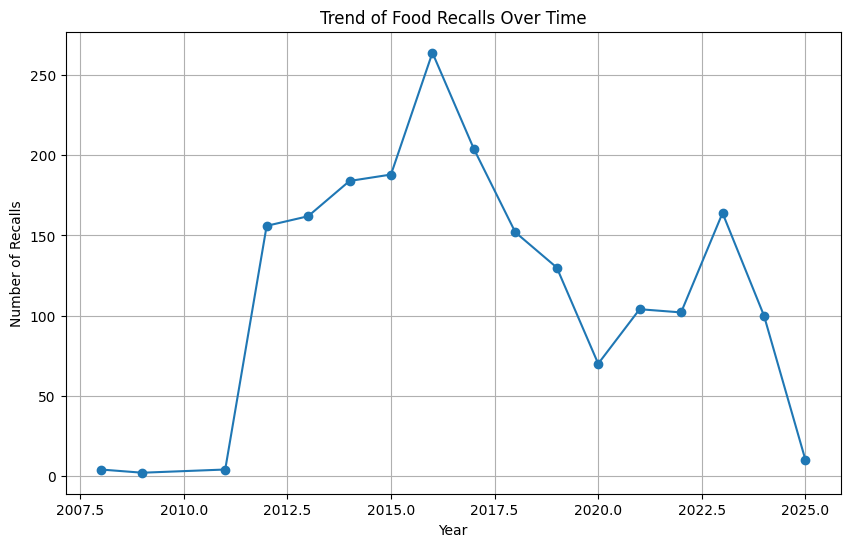

In [ ]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(recall_trend['year'], recall_trend['recall_count'], marker='o')
plt.title('Trend of Food Recalls Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Recalls')
plt.grid(True)
plt.show()

# Q2: Predict the number of recalls using Linear Regression
We used a Linear Regression model to predict how many recalls happen each year.
First, we split the data into training and testing sets.
Then, we trained the model and tested how well it worked by checking the Mean Squared Error (MSE) and R² score.
Finally, we made a plot to compare the actual and predicted numbers of recalls.

In [ ]:
# Import libraries needed for Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

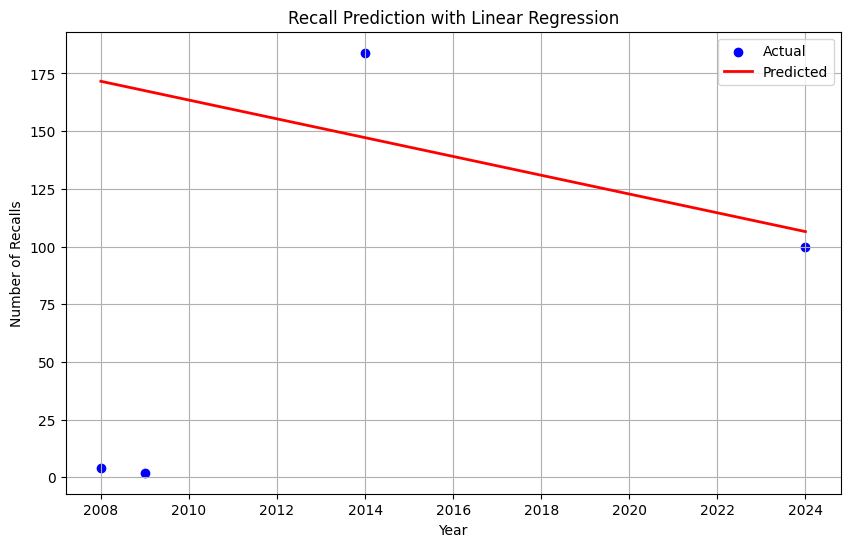

Model Coefficient: -4.070945945945945
Model Intercept: 8346.081081081078
Mean Squared Error: 14225.161788371874
R² Score: -1.4900725199548157


In [ ]:
# Define the prediction function
def predict_recall_trend():
    # Group data by year and count number of recalls
    yearly_recalls = recalls_df.groupby('year').size().reset_index(name='count')
    X = yearly_recalls['year'].values.reshape(-1, 1)
    y = yearly_recalls['count'].values

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
    plt.title('Recall Prediction with Linear Regression')
    plt.xlabel('Year')
    plt.ylabel('Number of Recalls')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Evaluate model
    print(f"Model Coefficient: {model.coef_[0]}")
    print(f"Model Intercept: {model.intercept_}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R² Score: {r2_score(y_test, y_pred)}")

predict_recall_trend()


# Q3: Analyze the distribution of recall severity classifications
We counted how many recalls belong to each classification type (Class I, II, III).  
We made a bar chart and a pie chart to show the differences and better understand the severity of the recalls.

In [ ]:
# Import libraries needed for plotting
import matplotlib.pyplot as plt

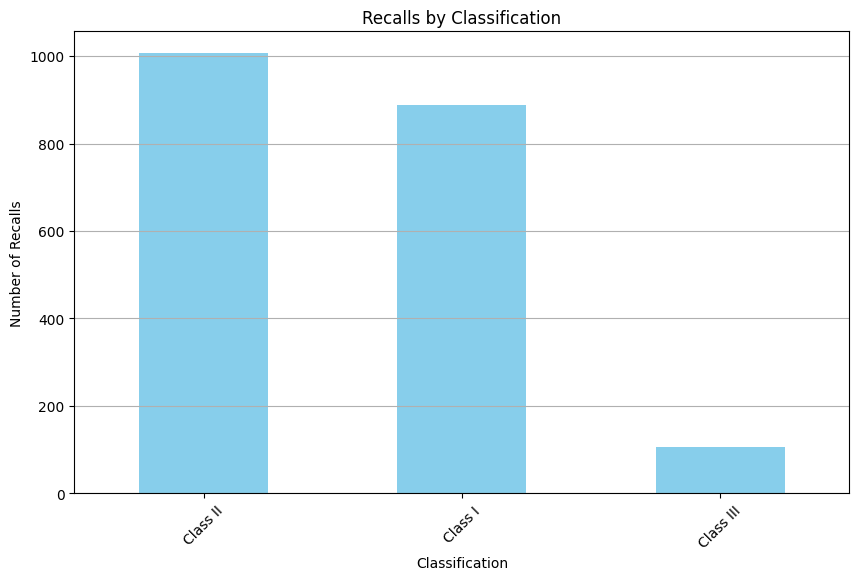

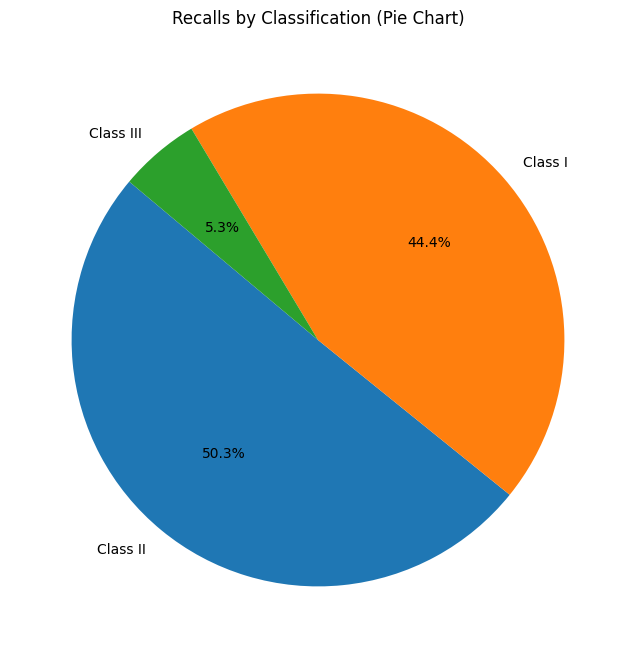

In [ ]:
def analyze_recall_classification():
    # Count number of recalls per classification
    classification_counts = recalls_df['classification'].value_counts()

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    classification_counts.plot(kind='bar', color='skyblue')
    plt.title('Recalls by Classification')
    plt.xlabel('Classification')
    plt.ylabel('Number of Recalls')
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.show()

    # Plot pie chart
    plt.figure(figsize=(8, 8))
    classification_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title('Recalls by Classification (Pie Chart)')
    plt.ylabel('')  # Remove y-axis label
    plt.show()

# Execute the function
analyze_recall_classification()

In this project, we collected food recall data using the openFDA API and cleaned the dataset to prepare it for analysis.  
We stored the cleaned data in an SQLite database and used pandas to work with it easily.

We performed focused on three key analyses:


*   **Trend Analysis**: We examined how the number of food recalls changed over time to identify any patterns or shifts in recall frequency.
*   **Prediction**: Using a Linear Regression model, we predicted future recall numbers, helping us understand potential future trends based on historical data.
*   **Classification Distribution**: We analyzed the distribution of recalls across different severity classifications (Class I, II, III) to assess the relative risks of each classification.
Through these analyses, we developed a deeper understanding of food recall trends, the impact of various recall classes, and the potential risks for future recalls.



Through these analyses, we gained a better understanding of food recall patterns and potential future risks. learning how to clean, visualize, and model data not only boosts a programmer's technical expertise but also enhances their ability to build impactful solutions.

